In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

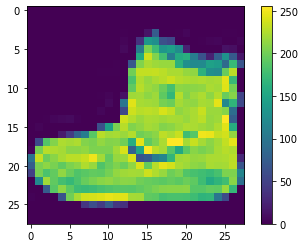

In [8]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
X_train = X_train / 255.0

X_test = X_test / 255.0

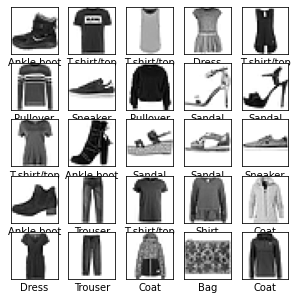

In [10]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=5)

Epoch 1/5


D:\Python\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 131s 69ms/step - loss: 0.3769 - accuracy: 0.8663 - val_loss: 0.2992 - val_accuracy: 0.8929
Epoch 2/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.2457 - accuracy: 0.9102 - val_loss: 0.2641 - val_accuracy: 0.8992
Epoch 3/5
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1989 - accuracy: 0.9262 - val_loss: 0.2378 - val_accuracy: 0.9129
Epoch 4/5
1875/1875 [==============================] - 117s 63ms/step - loss: 0.1648 - accuracy: 0.9377 - val_loss: 0.2496 - val_accuracy: 0.9118
Epoch 5/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1359 - accuracy: 0.9495 - val_loss: 0.2438 - val_accuracy: 0.9200


In [14]:
_, accuracy = model.evaluate(X_train,y_train)
print("Training accuracy: ", accuracy*100)

1875/1875 [==============================] - 39s 21ms/step - loss: 0.0975 - accuracy: 0.9646
Training accuracy:  96.45666480064392


In [15]:
_, accuracy = model.evaluate(X_test,y_test)
print("Training accuracy: ", accuracy*100)

313/313 [==============================] - 7s 20ms/step - loss: 0.2438 - accuracy: 0.9200
Training accuracy:  92.00000166893005


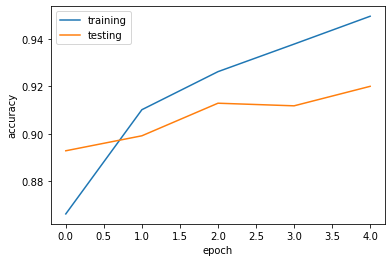

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training','testing'])
plt.show()

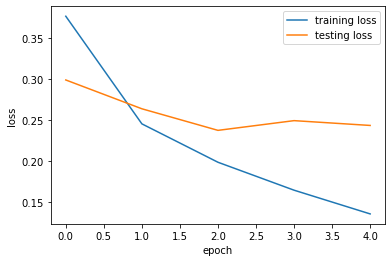

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training loss','testing loss'])
plt.show()

## Part 4 - Optimizing CNN + Data Augmentation

In [28]:
def Model(activation_function, kernel_size, opt):
    i = kernel_size
    model_modified = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(i,i),padding='same',activation=activation_function,input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(i,i),padding='same',activation=activation_function,input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=activation_function),
    tf.keras.layers.Dense(10, activation = 'softmax')
    ])
    model_modified.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=opt,metrics=['accuracy'])
    hist = model_modified.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=5)
    return model_modified, hist

In [29]:
def accuracy(model,hist):
    _, accuracy = model.evaluate(X_train,y_train)
    print("Training accuracy: ", accuracy*100)
    _, accuracy = model.evaluate(X_test,y_test)
    print("Testing accuracy: ", accuracy*100)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['training','testing'])
    plt.show()

In [32]:
#Model 1,2,3 - changing activation function

In [30]:
model1 , hist1 = Model('selu',3,'adam')

Epoch 1/5
1875/1875 [==============================] - 138s 73ms/step - loss: 0.3719 - accuracy: 0.8662 - val_loss: 0.3206 - val_accuracy: 0.8879
Epoch 2/5
1875/1875 [==============================] - 134s 71ms/step - loss: 0.2518 - accuracy: 0.9098 - val_loss: 0.2742 - val_accuracy: 0.9014
Epoch 3/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2021 - accuracy: 0.9259 - val_loss: 0.2648 - val_accuracy: 0.9051
Epoch 4/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.1630 - accuracy: 0.9396 - val_loss: 0.2541 - val_accuracy: 0.9155
Epoch 5/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1314 - accuracy: 0.9513 - val_loss: 0.2917 - val_accuracy: 0.9084


1875/1875 [==============================] - 26s 14ms/step - loss: 0.1065 - accuracy: 0.9624
Training accuracy:  96.23666405677795
313/313 [==============================] - 4s 14ms/step - loss: 0.2917 - accuracy: 0.9084
Testing accuracy:  90.83999991416931


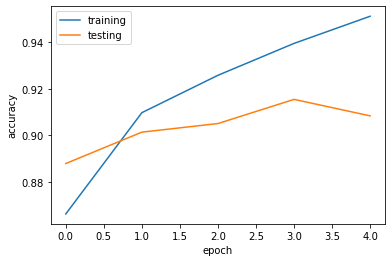

In [31]:
accuracy(model1,hist1)

In [33]:
model2 , hist2 = Model('elu',3,'adam')

Epoch 1/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3627 - accuracy: 0.8674 - val_loss: 0.3005 - val_accuracy: 0.8903
Epoch 2/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2409 - accuracy: 0.9118 - val_loss: 0.2622 - val_accuracy: 0.9079
Epoch 3/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.1905 - accuracy: 0.9291 - val_loss: 0.2532 - val_accuracy: 0.9070
Epoch 4/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1512 - accuracy: 0.9434 - val_loss: 0.2535 - val_accuracy: 0.9196
Epoch 5/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.1188 - accuracy: 0.9559 - val_loss: 0.2847 - val_accuracy: 0.9106


1875/1875 [==============================] - 32s 17ms/step - loss: 0.0956 - accuracy: 0.9637
Training accuracy:  96.36666774749756
313/313 [==============================] - 6s 18ms/step - loss: 0.2847 - accuracy: 0.9106
Testing accuracy:  91.06000065803528


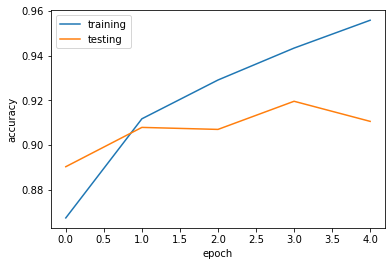

In [34]:
accuracy(model2,hist2)

In [35]:
model3 , hist3 = Model('tanh',3,'adam')

Epoch 1/5
1875/1875 [==============================] - 116s 61ms/step - loss: 0.3605 - accuracy: 0.8693 - val_loss: 0.2850 - val_accuracy: 0.8946
Epoch 2/5
1875/1875 [==============================] - 115s 62ms/step - loss: 0.2445 - accuracy: 0.9099 - val_loss: 0.2724 - val_accuracy: 0.9007
Epoch 3/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1995 - accuracy: 0.9265 - val_loss: 0.2694 - val_accuracy: 0.9005
Epoch 4/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1742 - accuracy: 0.9357 - val_loss: 0.2835 - val_accuracy: 0.8993
Epoch 5/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1529 - accuracy: 0.9435 - val_loss: 0.2503 - val_accuracy: 0.9128


1875/1875 [==============================] - 34s 18ms/step - loss: 0.1213 - accuracy: 0.9571
Training accuracy:  95.70833444595337
313/313 [==============================] - 5s 16ms/step - loss: 0.2503 - accuracy: 0.9128
Testing accuracy:  91.28000140190125


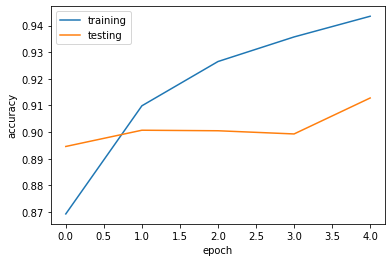

In [36]:
accuracy(model3,hist3)

In [37]:
#model 4,5,6 - changing kernel size

In [38]:
model4 , hist4 = Model('relu',5,'adam')

Epoch 1/5
1875/1875 [==============================] - 153s 81ms/step - loss: 0.3816 - accuracy: 0.8635 - val_loss: 0.2987 - val_accuracy: 0.8924
Epoch 2/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.2501 - accuracy: 0.9069 - val_loss: 0.2559 - val_accuracy: 0.9076
Epoch 3/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.2067 - accuracy: 0.9230 - val_loss: 0.2523 - val_accuracy: 0.9087
Epoch 4/5
1875/1875 [==============================] - 183s 98ms/step - loss: 0.1724 - accuracy: 0.9355 - val_loss: 0.2452 - val_accuracy: 0.9134
Epoch 5/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.1439 - accuracy: 0.9463 - val_loss: 0.2364 - val_accuracy: 0.9201


1875/1875 [==============================] - 43s 23ms/step - loss: 0.1071 - accuracy: 0.9614
Training accuracy:  96.13500237464905
313/313 [==============================] - 7s 23ms/step - loss: 0.2364 - accuracy: 0.9201
Testing accuracy:  92.00999736785889


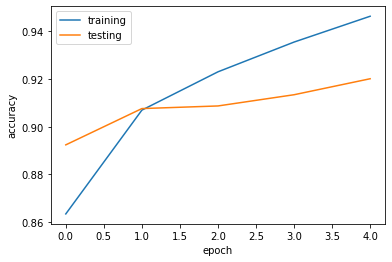

In [39]:
accuracy(model4,hist4)

In [40]:
model5 , hist5 = Model('relu',7,'adam')

Epoch 1/5
1875/1875 [==============================] - 304s 162ms/step - loss: 0.3914 - accuracy: 0.8590 - val_loss: 0.3220 - val_accuracy: 0.8816
Epoch 2/5
1875/1875 [==============================] - 294s 157ms/step - loss: 0.2582 - accuracy: 0.9051 - val_loss: 0.2846 - val_accuracy: 0.8930
Epoch 3/5
1875/1875 [==============================] - 296s 158ms/step - loss: 0.2138 - accuracy: 0.9204 - val_loss: 0.2414 - val_accuracy: 0.9136
Epoch 4/5
1875/1875 [==============================] - 296s 158ms/step - loss: 0.1799 - accuracy: 0.9328 - val_loss: 0.2395 - val_accuracy: 0.9161
Epoch 5/5
1875/1875 [==============================] - 305s 162ms/step - loss: 0.1513 - accuracy: 0.9425 - val_loss: 0.2375 - val_accuracy: 0.9136


1875/1875 [==============================] - 72s 38ms/step - loss: 0.1195 - accuracy: 0.9578
Training accuracy:  95.77500224113464
313/313 [==============================] - 12s 39ms/step - loss: 0.2375 - accuracy: 0.9136
Testing accuracy:  91.36000275611877


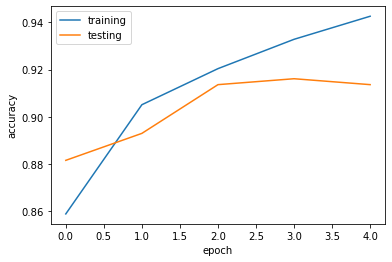

In [41]:
accuracy(model5,hist5)

In [42]:
model6 , hist6 = Model('relu',9,'adam')

Epoch 1/5
1875/1875 [==============================] - 456s 243ms/step - loss: 0.3999 - accuracy: 0.8542 - val_loss: 0.2986 - val_accuracy: 0.8901
Epoch 2/5
1875/1875 [==============================] - 480s 256ms/step - loss: 0.2674 - accuracy: 0.9002 - val_loss: 0.2886 - val_accuracy: 0.8977
Epoch 3/5
1875/1875 [==============================] - 463s 247ms/step - loss: 0.2226 - accuracy: 0.9163 - val_loss: 0.2597 - val_accuracy: 0.9054
Epoch 4/5
1875/1875 [==============================] - 453s 241ms/step - loss: 0.1918 - accuracy: 0.9271 - val_loss: 0.2552 - val_accuracy: 0.9075
Epoch 5/5
1875/1875 [==============================] - 450s 240ms/step - loss: 0.1623 - accuracy: 0.9379 - val_loss: 0.2563 - val_accuracy: 0.9122


1875/1875 [==============================] - 100s 53ms/step - loss: 0.1240 - accuracy: 0.9527
Training accuracy:  95.27166485786438
313/313 [==============================] - 17s 55ms/step - loss: 0.2563 - accuracy: 0.9122
Testing accuracy:  91.21999740600586


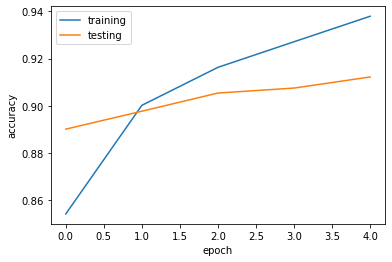

In [43]:
accuracy(model6,hist6)

In [44]:
model7 , hist7 = Model('relu',5,'adamax')

Epoch 1/5
1875/1875 [==============================] - 152s 80ms/step - loss: 0.4522 - accuracy: 0.8371 - val_loss: 0.3613 - val_accuracy: 0.8712
Epoch 2/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.2995 - accuracy: 0.8937 - val_loss: 0.3050 - val_accuracy: 0.8883
Epoch 3/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.2526 - accuracy: 0.9087 - val_loss: 0.2771 - val_accuracy: 0.8993
Epoch 4/5
1875/1875 [==============================] - 153s 82ms/step - loss: 0.2229 - accuracy: 0.9197 - val_loss: 0.2611 - val_accuracy: 0.9084
Epoch 5/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.1962 - accuracy: 0.9285 - val_loss: 0.2382 - val_accuracy: 0.9152


1875/1875 [==============================] - 40s 21ms/step - loss: 0.1683 - accuracy: 0.9391
Training accuracy:  93.91166567802429
313/313 [==============================] - 7s 23ms/step - loss: 0.2382 - accuracy: 0.9152
Testing accuracy:  91.51999950408936


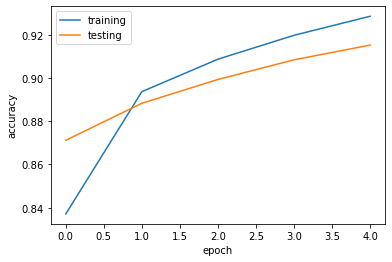

In [45]:
accuracy(model7,hist7)

In [46]:
model8 , hist8 = Model('relu',5,'adadelta')

Epoch 1/5
1875/1875 [==============================] - 164s 86ms/step - loss: 2.1290 - accuracy: 0.4267 - val_loss: 1.8965 - val_accuracy: 0.4834
Epoch 2/5
1875/1875 [==============================] - 157s 84ms/step - loss: 1.5388 - accuracy: 0.5743 - val_loss: 1.2404 - val_accuracy: 0.6226
Epoch 3/5
1875/1875 [==============================] - 157s 84ms/step - loss: 1.0776 - accuracy: 0.6492 - val_loss: 0.9779 - val_accuracy: 0.6593
Epoch 4/5
1875/1875 [==============================] - 156s 83ms/step - loss: 0.9068 - accuracy: 0.6854 - val_loss: 0.8718 - val_accuracy: 0.6935
Epoch 5/5
1875/1875 [==============================] - 153s 82ms/step - loss: 0.8263 - accuracy: 0.7127 - val_loss: 0.8127 - val_accuracy: 0.7093


1875/1875 [==============================] - 41s 22ms/step - loss: 0.7974 - accuracy: 0.7186
Training accuracy:  71.86333537101746
313/313 [==============================] - 7s 22ms/step - loss: 0.8127 - accuracy: 0.7093
Testing accuracy:  70.92999815940857


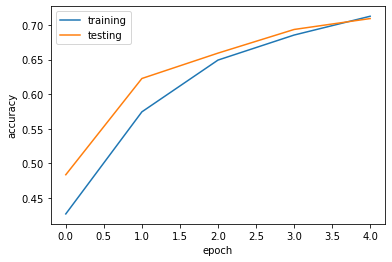

In [47]:
accuracy(model8,hist8)

In [48]:
model9 , hist9 = Model('relu',5,'ftrl')

Epoch 1/5
1875/1875 [==============================] - 159s 84ms/step - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 161s 86ms/step - loss: 2.3026 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 161s 86ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 162s 86ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 167s 89ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000


1875/1875 [==============================] - 43s 23ms/step - loss: 2.3026 - accuracy: 0.1000
Training accuracy:  10.000000149011612
313/313 [==============================] - 7s 22ms/step - loss: 2.3026 - accuracy: 0.1000
Testing accuracy:  10.000000149011612


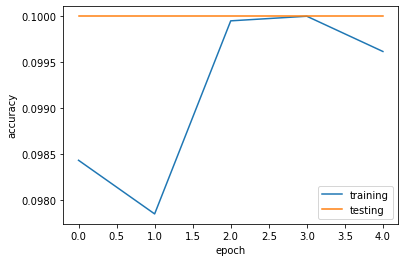

In [49]:
accuracy(model9,hist9)

## Data augmentation

In [ ]:
aug_ds = X_train.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [ ]:
aug_ds

In [ ]:
hist = model.fit(x, y, validation_data = (X_test,y_test), epochs=5)

In [18]:
#references:
#https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
#https://keras.io/api/layers/pooling_layers/max_pooling2d/
#https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
#https://www.tensorflow.org/tutorials/images/data_augmentation